In [1]:
# Librerias
## tratamiento de datos
import pandas as pd
import numpy as np

## visualizacion
import matplotlib.pyplot as plt
import seaborn as sb

#Advertencias
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('datos_caso_3.csv')

# Preparacion de datos

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2500 non-null   int64  
 1   Person ID                2500 non-null   int64  
 2   Gender                   2500 non-null   object 
 3   Age                      2500 non-null   int64  
 4   Occupation               2500 non-null   object 
 5   Sleep Duration           2500 non-null   float64
 6   Quality of Sleep         2500 non-null   int64  
 7   Physical Activity Level  2500 non-null   int64  
 8   Stress Level             2500 non-null   int64  
 9   BMI Category             2500 non-null   object 
 10  Blood Pressure           2500 non-null   object 
 11  Heart Rate               2500 non-null   int64  
 12  Daily Steps              2500 non-null   int64  
 13  Sleep Disorder           1052 non-null   object 
dtypes: float64(1), int64(8),

,Unnamed: 0,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,55,1,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,NaN
1,341,2,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,NaN
2,352,3,Female,58,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
3,134,4,Male,38,Lawyer,7.3,8,60,5,Normal,130/85,68,8000,NaN
4,264,5,Male,48,Doctor,7.3,7,65,5,Obese,142/92,83,3500,Insomnia


## Estadistica Univariada

Se observa que los datos "None" de la columna "Sleep Desorder" no se llenaron  correctamente y los esta tomando como NaN, entonces primero se rellenara los datos faltantes

In [4]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')

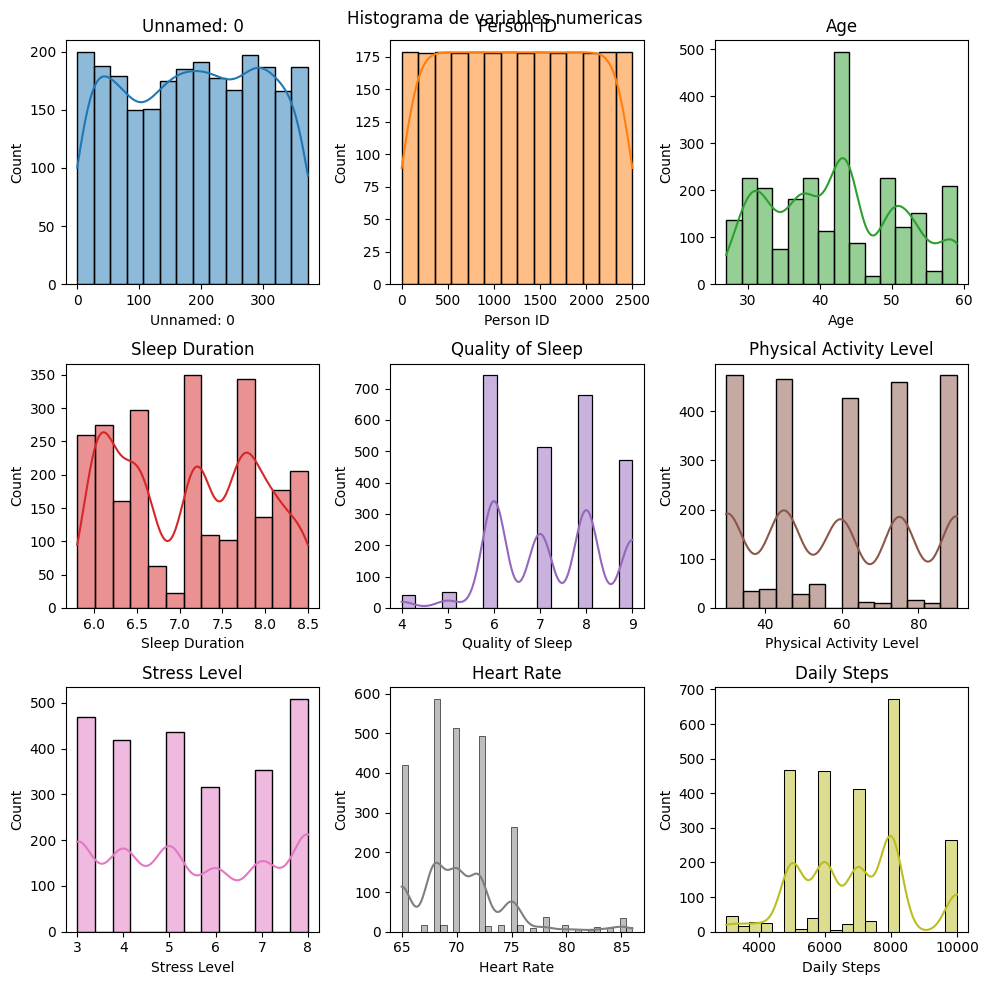

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(10,10))
ax = ax.flat
num_col= data.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data=data, kde=True,x=col,color=(list(plt.rcParams['axes.prop_cycle'])*7)[i]['color'], ax=ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Histograma de variables numericas')
plt.show()


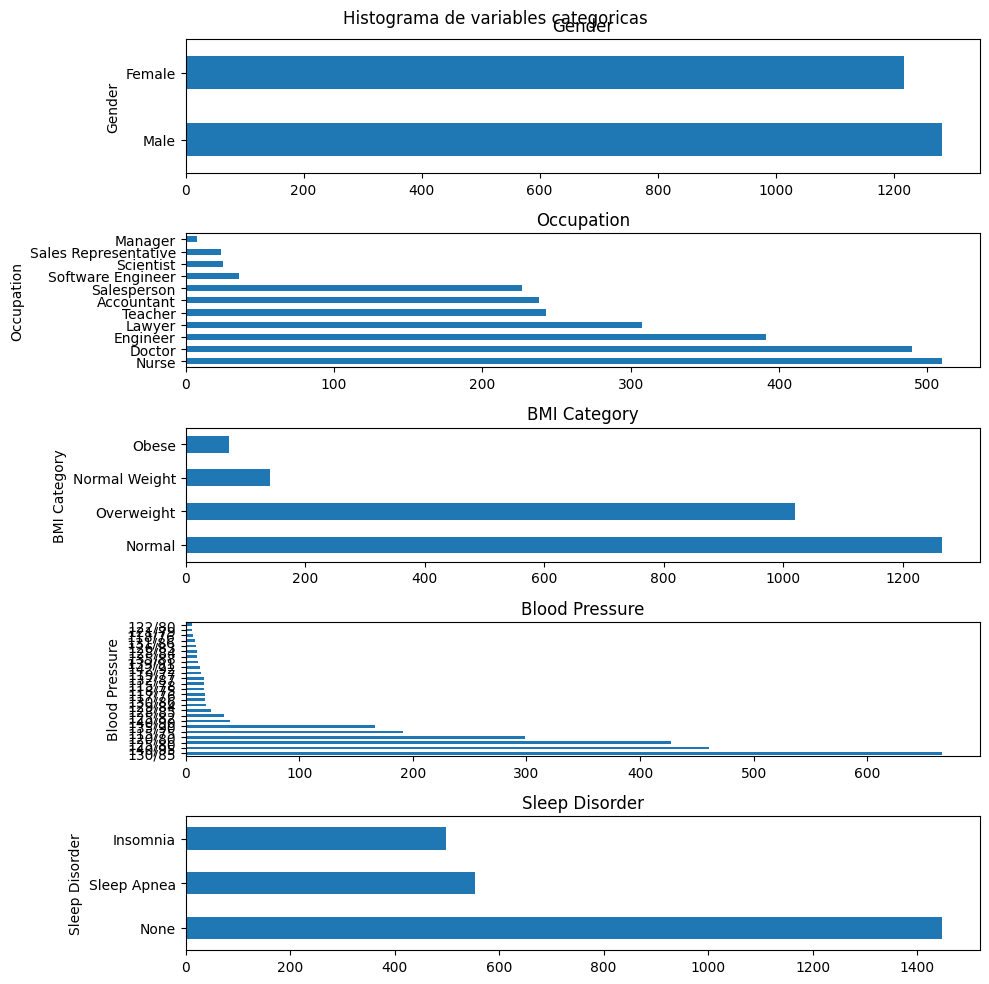

In [6]:
## Estadistica univariada
## Histograma de frecuenteia de varibales categoricas
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax = ax.flat
cat_data= data.select_dtypes(include=['object']).columns
for i, col in enumerate(cat_data):
    data[col].value_counts().plot.barh(ax=ax[i])
    ax[i].set_title(col)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Histograma de variables categoricas')
plt.show()


## Correlacion

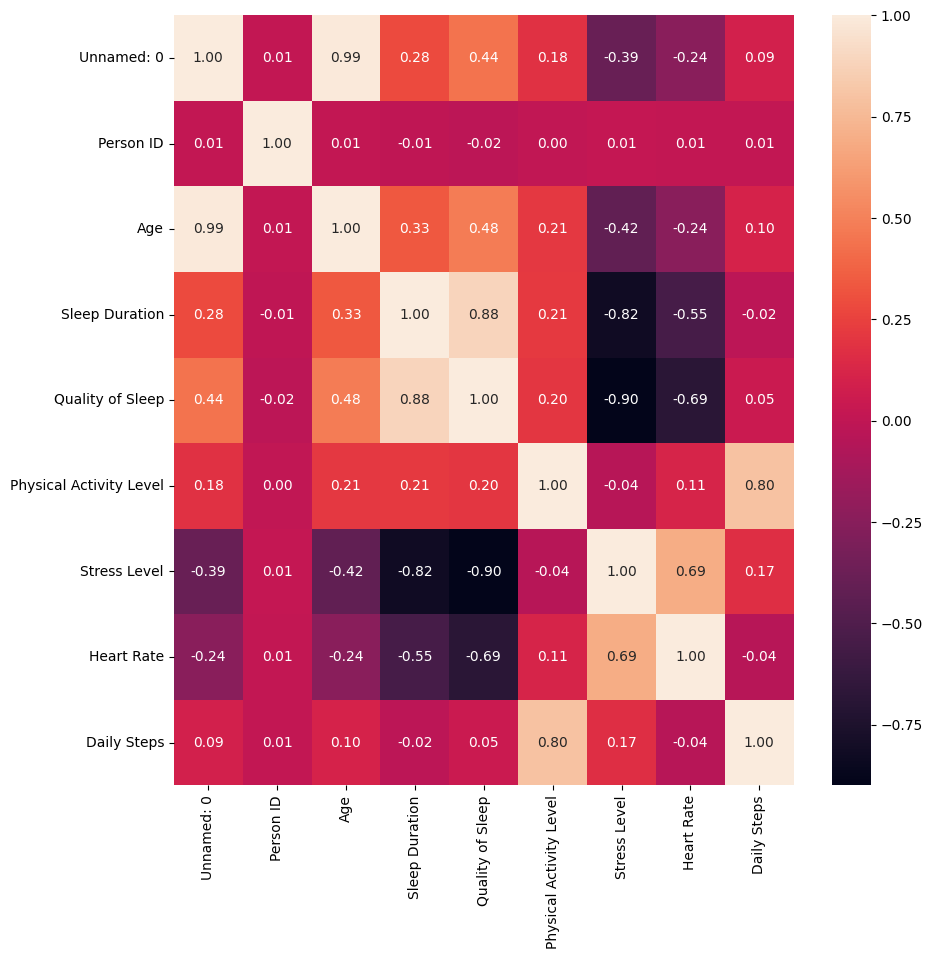

In [7]:
#Grarfico de correlacion de pearson
plt.figure(figsize=(10,10))
sb.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

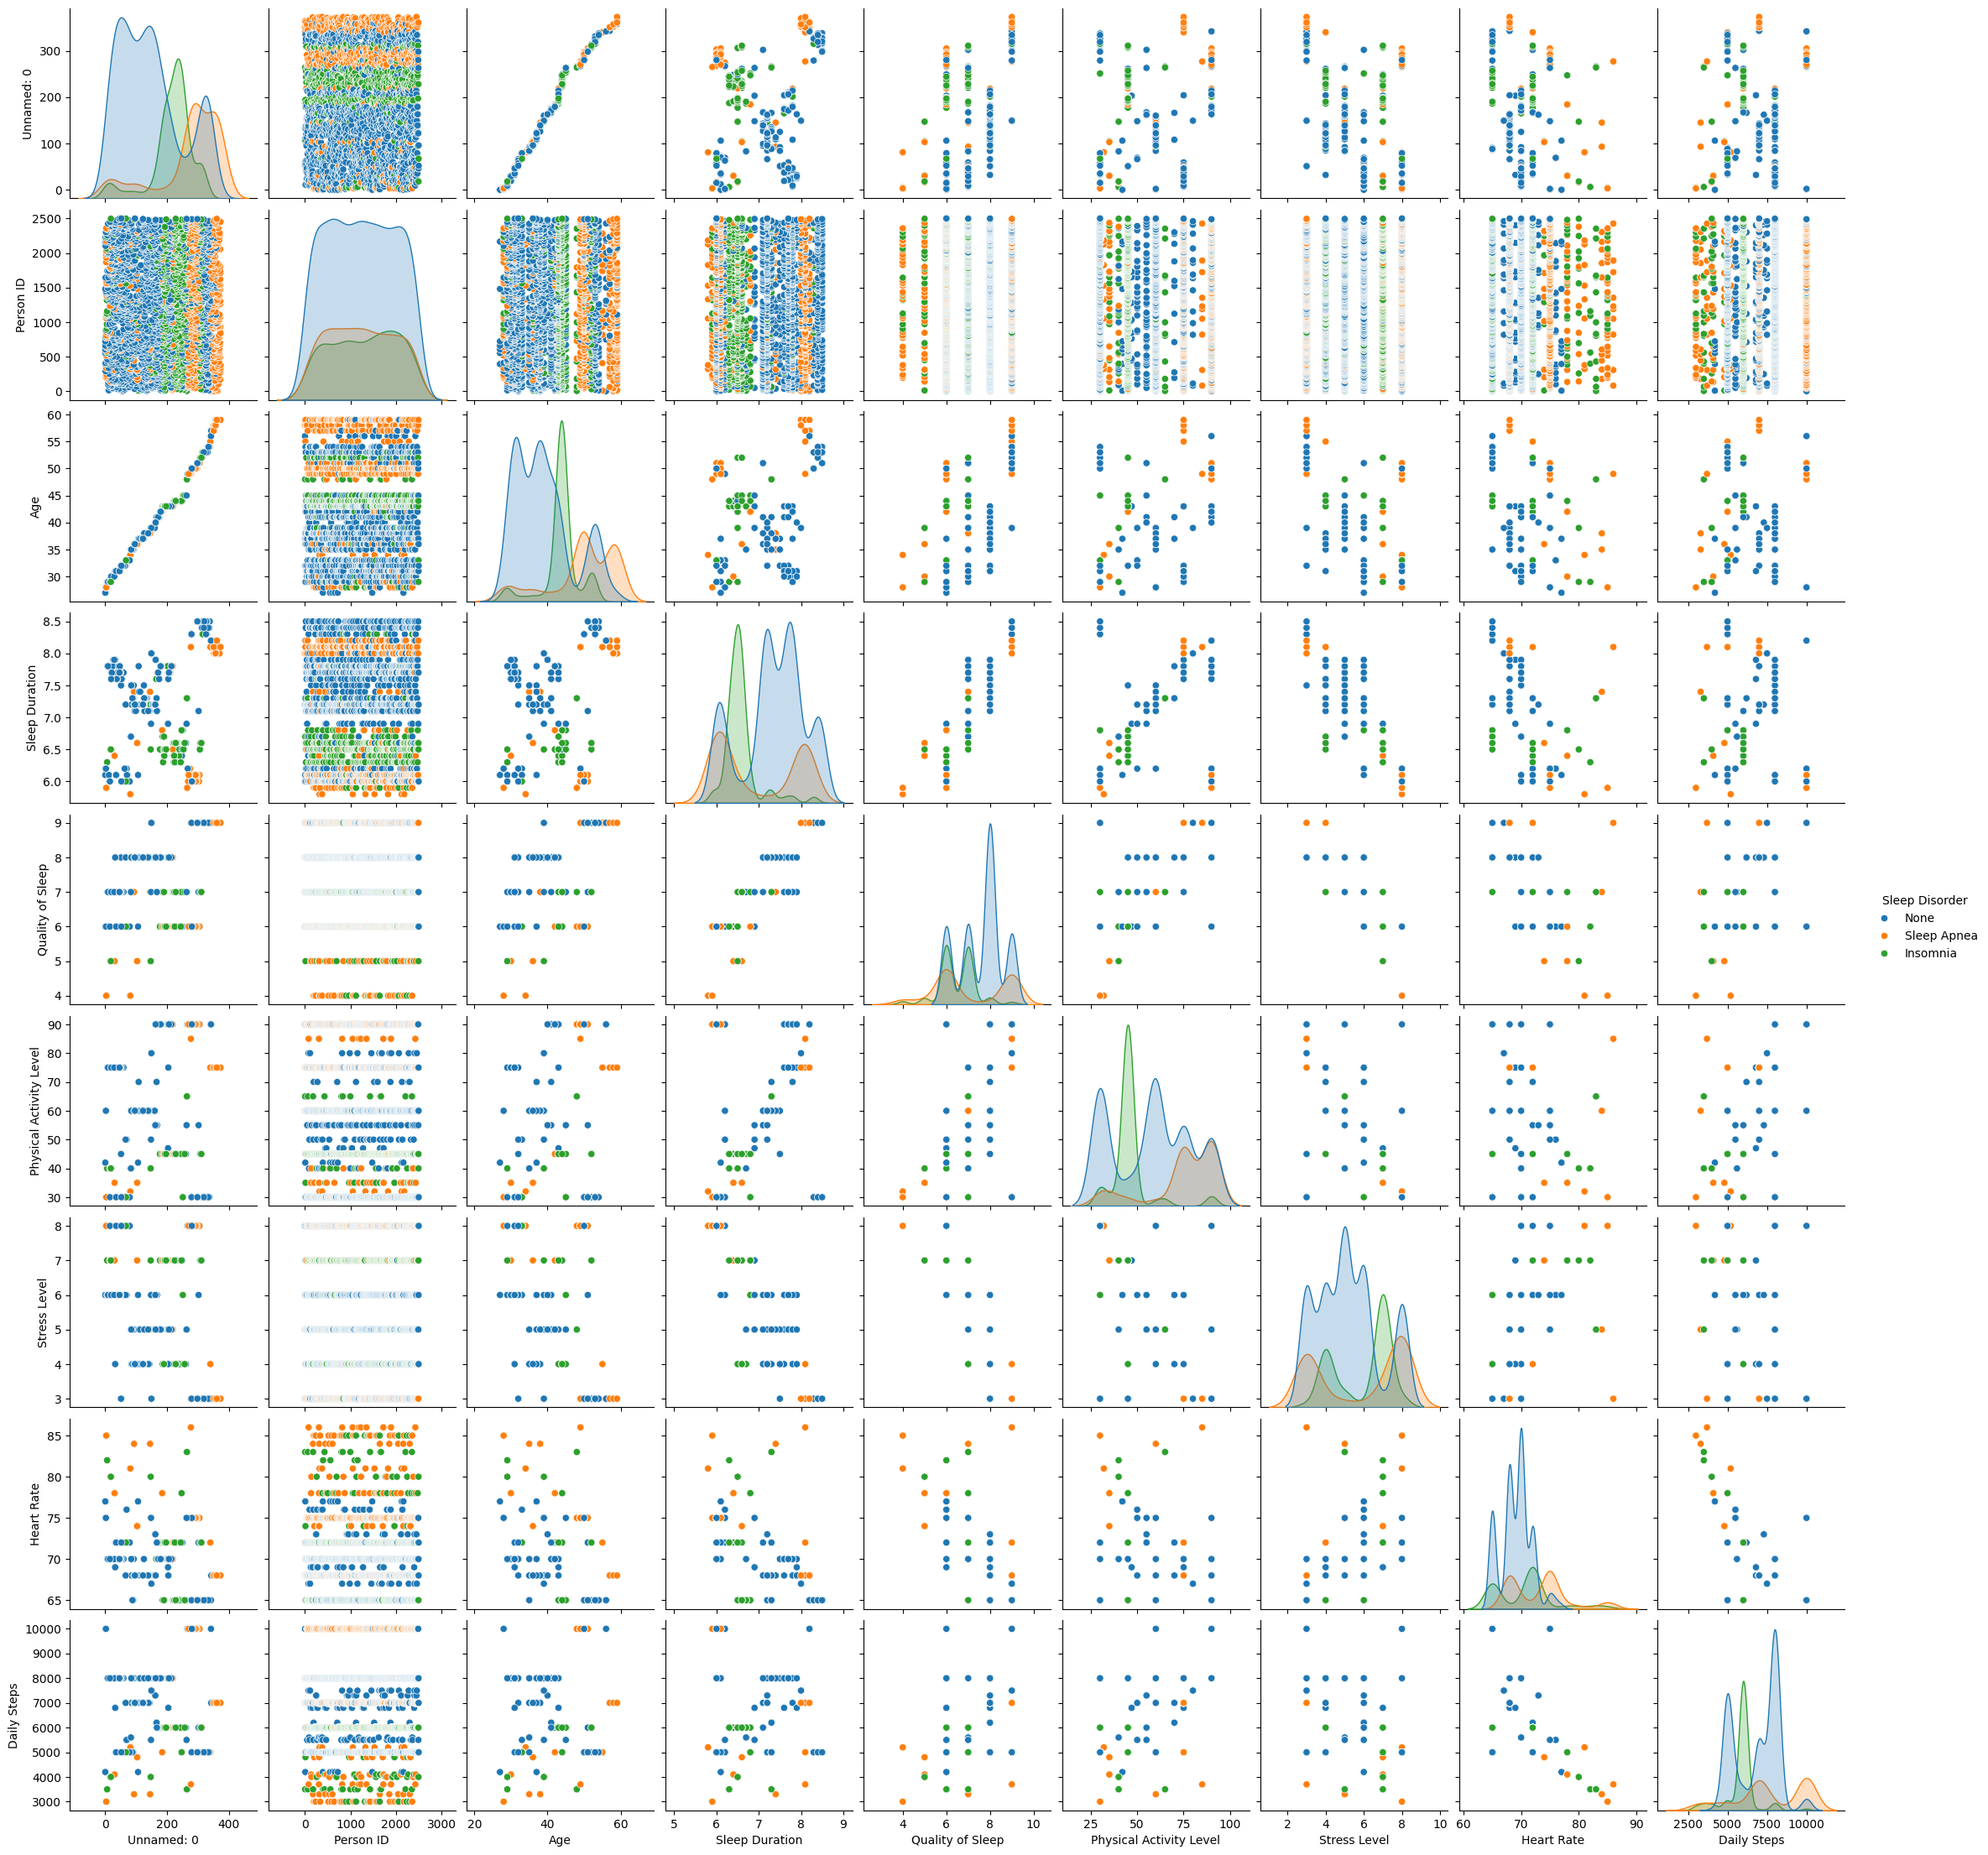

In [8]:
sb.pairplot(data=data, hue='Sleep Disorder')

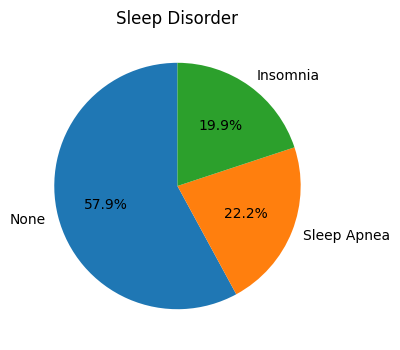

In [9]:
sleep_disorder_counts = data['Sleep Disorder'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4,4))  # Optional: Adjust the figure size
plt.pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sleep Disorder')
plt.show()

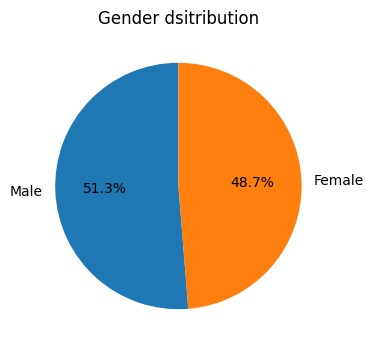

In [10]:
sleep_disorder_counts = data['Gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4,4))  # Optional: Adjust the figure size
plt.pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender dsitribution')
plt.show()

## Eliminar variables

- Se puede observar que existen 2 variables que no aportan nada Unnamed, Gender PersonID asi que las eliminamos
- Hay 2 variables altamente relacionadas daily steps/Physical activity level y QualitySleep/DurationSleep. Como ambas presentan una correlacioin mayor al .75 de decide eliminar las variablles Physical activity level y QualitySleep por ser las mas correlacionadas con respecto a otrasa variables.

In [11]:
data.drop(['Unnamed: 0', 'Person ID','Physical Activity Level','Quality of Sleep'], axis=1, inplace=True)

In [12]:
data.head() 

,Gender,Age,Occupation,Sleep Duration,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,32,Doctor,6.0,8,Normal,125/80,72,5000,None
1,Female,56,Doctor,8.2,3,Normal Weight,118/75,65,10000,None
2,Female,58,Nurse,8.0,3,Overweight,140/95,68,7000,Sleep Apnea
3,Male,38,Lawyer,7.3,5,Normal,130/85,68,8000,None
4,Male,48,Doctor,7.3,5,Obese,142/92,83,3500,Insomnia


In [13]:
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand = True)
data['Systolic'] = pd.to_numeric(data['Systolic'], errors = 'coerce')
data['Diastolic'] = pd.to_numeric(data['Diastolic'], errors = 'coerce')
print(data[['Systolic', 'Diastolic']].head())

   Systolic  Diastolic
0       125         80
1       118         75
2       140         95
3       130         85
4       142         92


In [14]:
data['Blood Pressure'] = data['Systolic'] + (2 * data['Diastolic'])/3 
print(data['Blood Pressure'].head())

0    178.333333
1    168.000000
2    203.333333
3    186.666667
4    203.333333
Name: Blood Pressure, dtype: float64


In [15]:
data.head() 

,Gender,Age,Occupation,Sleep Duration,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,32,Doctor,6.0,8,Normal,178.333333,72,5000,None,125,80
1,Female,56,Doctor,8.2,3,Normal Weight,168.000000,65,10000,None,118,75
2,Female,58,Nurse,8.0,3,Overweight,203.333333,68,7000,Sleep Apnea,140,95
3,Male,38,Lawyer,7.3,5,Normal,186.666667,68,8000,None,130,85
4,Male,48,Doctor,7.3,5,Obese,203.333333,83,3500,Insomnia,142,92


In [16]:
data.drop(['Systolic','Diastolic'], axis=1, inplace=True)

In [17]:
data.head() 

,Gender,Age,Occupation,Sleep Duration,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,32,Doctor,6.0,8,Normal,178.333333,72,5000,None
1,Female,56,Doctor,8.2,3,Normal Weight,168.000000,65,10000,None
2,Female,58,Nurse,8.0,3,Overweight,203.333333,68,7000,Sleep Apnea
3,Male,38,Lawyer,7.3,5,Normal,186.666667,68,8000,None
4,Male,48,Doctor,7.3,5,Obese,203.333333,83,3500,Insomnia


## Arreglar problema con el BMI

Hay un problema con el BMI ya que hay 2 variables Normal y Normal Weight, que representan exactamente lo mismo etonces cambiamos normal a normal weight

In [18]:
data['BMI Category'] = data['BMI Category'].replace('Normal', 'Normal Weight')

In [19]:
sleep_disorder_counts = data['Sleep Disorder'].value_counts()
print(sleep_disorder_counts)

Sleep Disorder
None           1448
Sleep Apnea     554
Insomnia        498
Name: count, dtype: int64


## Balanceo de de variable objetivo

Tenemos un problema y es que la variable objetivo esta completamente desvalanceada, en este caso, como son demasiados datos de None, se decicidio tener un submuestreo y dejarlas todas al rededor de 500 datos

In [20]:
data_Insomnia = data[data['Sleep Disorder']=='Insomnia']
data_SleepApnea = data[data['Sleep Disorder']=='Sleep Apnea']
data_None = data[data['Sleep Disorder']=='None']
print(data_Insomnia.shape)
print(data_SleepApnea.shape)
print(data_None.shape)

(498, 10)
(554, 10)
(1448, 10)


In [21]:
data_new = data_None.sample(data_Insomnia.shape[0], replace=True)

data_sub=pd.concat([data_new, data_Insomnia,data_SleepApnea], axis=0)
data_sub=data_sub.reset_index(drop=True)
data_sub.info()
data=data_sub

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1550 non-null   object 
 1   Age             1550 non-null   int64  
 2   Occupation      1550 non-null   object 
 3   Sleep Duration  1550 non-null   float64
 4   Stress Level    1550 non-null   int64  
 5   BMI Category    1550 non-null   object 
 6   Blood Pressure  1550 non-null   float64
 7   Heart Rate      1550 non-null   int64  
 8   Daily Steps     1550 non-null   int64  
 9   Sleep Disorder  1550 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 121.2+ KB


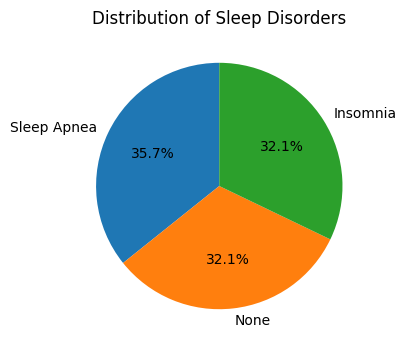

In [22]:
sleep_disorder_counts = data['Sleep Disorder'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4,4))  # Optional: Adjust the figure size
plt.pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sleep Disorders')
plt.show()

#  Modelos

###  Transformacion de datos

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1550 non-null   object 
 1   Age             1550 non-null   int64  
 2   Occupation      1550 non-null   object 
 3   Sleep Duration  1550 non-null   float64
 4   Stress Level    1550 non-null   int64  
 5   BMI Category    1550 non-null   object 
 6   Blood Pressure  1550 non-null   float64
 7   Heart Rate      1550 non-null   int64  
 8   Daily Steps     1550 non-null   int64  
 9   Sleep Disorder  1550 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 121.2+ KB


In [25]:
X=data.drop(['Sleep Disorder'], axis=1)
y=data['Sleep Disorder']
num_col=X.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_col=X.select_dtypes(include=['object']).columns.to_list()

num_transformer= Pipeline(steps=[('scaler', MinMaxScaler())])
cat_transformer= Pipeline(steps=[('encoder', OneHotEncoder())])

preprocessor= ColumnTransformer(transformers=[('num', num_transformer, num_col),
                                            ('cat', cat_transformer, cat_col)],
                                            remainder='passthrough')
preprocessor



ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'Sleep Duration', 'Stress Level',
                                  'Blood Pressure', 'Heart Rate',
                                  'Daily Steps']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Gender', 'Occupation', 'BMI Category'])])

In [26]:
X_pre= preprocessor.fit_transform(X)
cod_cat= preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels= np.concatenate([num_col, cod_cat])
X_pro= pd.DataFrame(X_pre, columns=labels)
X_pro.head()

,Age,Sleep Duration,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,0.28125,0.481481,0.2,0.000000,0.142857,0.571429,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.00000,0.814815,0.0,1.000000,0.142857,0.571429,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.25000,0.555556,0.2,0.347826,0.000000,0.285714,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.81250,1.000000,0.0,0.347826,0.000000,0.285714,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.34375,0.481481,0.4,0.565217,0.142857,0.714286,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_pro, y, train_size=0.7)
print(X_train.shape)

(1085, 22)


## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
modelo_1= LogisticRegression(random_state=10)
modelo_1.fit(X_train, y_train)

LogisticRegression(random_state=10)

              precision    recall  f1-score   support

    Insomnia       0.93      0.88      0.90       347
        None       0.87      0.95      0.91       346
 Sleep Apnea       0.94      0.90      0.92       392

    accuracy                           0.91      1085
   macro avg       0.91      0.91      0.91      1085
weighted avg       0.91      0.91      0.91      1085



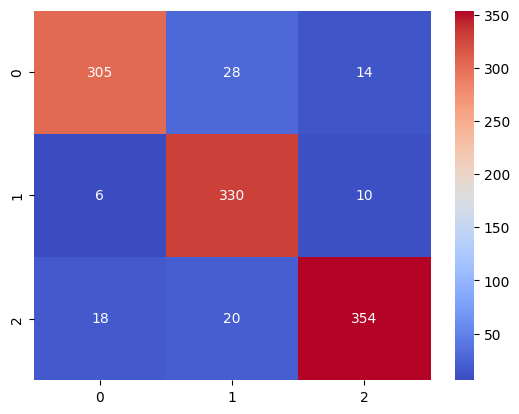

In [30]:
#Obtener las preficciones en entrenamiento
y_pred_train= modelo_1.predict(X_train)
#Reporte de clasificacion
print(classification_report(y_train, y_pred_train))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, cmap='coolwarm', fmt='d')
plt.show()

              precision    recall  f1-score   support

    Insomnia       0.93      0.88      0.90       151
        None       0.86      0.92      0.89       152
 Sleep Apnea       0.93      0.91      0.92       162

    accuracy                           0.91       465
   macro avg       0.91      0.91      0.91       465
weighted avg       0.91      0.91      0.91       465



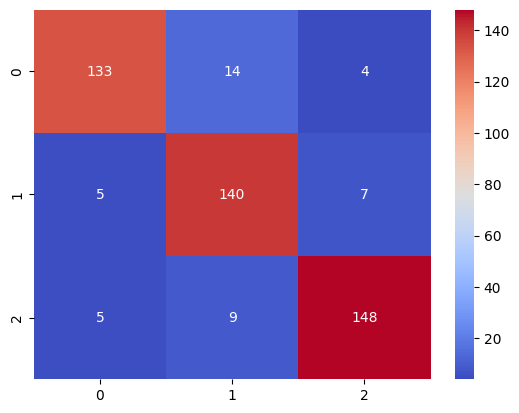

In [31]:
#Obtener las preficciones en validacion
y_pred_test= modelo_1.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

In [32]:
#Busqueda de hiperparametros
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
modelo_1= LogisticRegression(solver='saga', random_state=10)
param_grid= {'C': [0.00001,0.0001,0.01,0.1,1,10,100,1000],
              'penalty': ['l1', 'l2','elasticnet',None]}
#Busqueda exhaustiva
classifier_e= GridSearchCV(estimator=modelo_1, param_grid=param_grid, cv=5)
classifier_e.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=10, solver='saga'),
             param_grid={'C': [1e-05, 0.0001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [33]:
validation=pd.concat([pd.DataFrame(classifier_e.cv_results_["params"]),pd.DataFrame(classifier_e.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

,C,penalty,Accuracy
21,10.00000,l2,0.914286
20,10.00000,l1,0.913364
3,0.00001,None,0.912442
7,0.00010,None,0.912442
11,0.01000,None,0.912442
19,1.00000,None,0.912442
24,100.00000,l1,0.912442
25,100.00000,l2,0.912442
27,100.00000,None,0.912442
28,1000.00000,l1,0.912442


In [34]:
#Aleatorizada
classifier_r= RandomizedSearchCV(estimator=modelo_1, param_distributions=param_grid, cv=5, n_iter=10)
classifier_r.fit(X_train, y_train)

validation=pd.concat([pd.DataFrame(classifier_r.cv_results_["params"]),pd.DataFrame(classifier_r.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

,penalty,C,Accuracy
0,None,0.10000,0.912442
2,None,1.00000,0.912442
5,None,1000.00000,0.912442
9,l2,1.00000,0.899539
3,l2,0.10000,0.881106
7,l2,0.01000,0.851613
1,elasticnet,0.00010,NaN
4,elasticnet,0.00001,NaN
6,elasticnet,10.00000,NaN
8,elasticnet,1.00000,NaN


In [35]:
modelo_1_final= classifier_r.best_estimator_
modelo_1_final


LogisticRegression(C=0.1, penalty=None, random_state=10, solver='saga')

              precision    recall  f1-score   support

    Insomnia       0.95      0.87      0.91       151
        None       0.86      0.91      0.89       152
 Sleep Apnea       0.92      0.93      0.92       162

    accuracy                           0.91       465
   macro avg       0.91      0.90      0.91       465
weighted avg       0.91      0.91      0.91       465



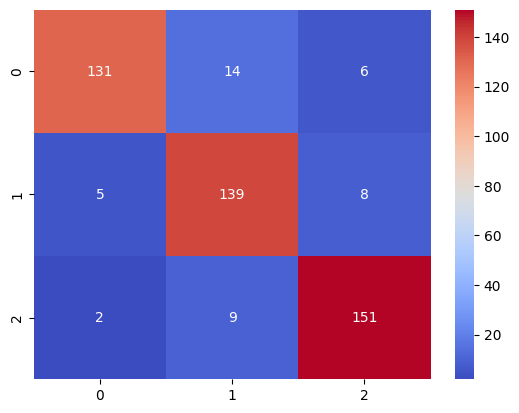

In [36]:
#Obtener las preficciones en validacion
y_pred_test= modelo_1_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

## SVM

In [37]:
from sklearn.svm import SVC
modelo_2= SVC()
param_grid= {'C': [0.00001,0.0001,0.01,0.1,1,10,15,20,50],
                'kernel': ['linear', 'poly','rbf','sigmoid'],
                'degree': [2,3,4,5]}

classifier= GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=5)
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1e-05, 0.0001, 0.01, 0.1, 1, 10, 15, 20, 50],
                         'degree': [2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [38]:
validation=pd.concat([pd.DataFrame(classifier.cv_results_["params"]),pd.DataFrame(classifier.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

,C,degree,kernel,Accuracy
77,1.0000,5,poly,0.915207
130,50.0000,2,rbf,0.914286
122,20.0000,4,rbf,0.914286
134,50.0000,3,rbf,0.914286
117,20.0000,3,poly,0.914286
...,...,...,...,...
20,0.0001,3,linear,0.361290
19,0.0001,2,sigmoid,0.361290
18,0.0001,2,rbf,0.361290
17,0.0001,2,poly,0.361290


In [39]:
modelo_2_final= classifier.best_estimator_
modelo_2_final


SVC(C=1, degree=5, kernel='poly')

SVM
              precision    recall  f1-score   support

    Insomnia       0.92      0.88      0.90       151
        None       0.86      0.92      0.89       152
 Sleep Apnea       0.92      0.90      0.91       162

    accuracy                           0.90       465
   macro avg       0.90      0.90      0.90       465
weighted avg       0.90      0.90      0.90       465



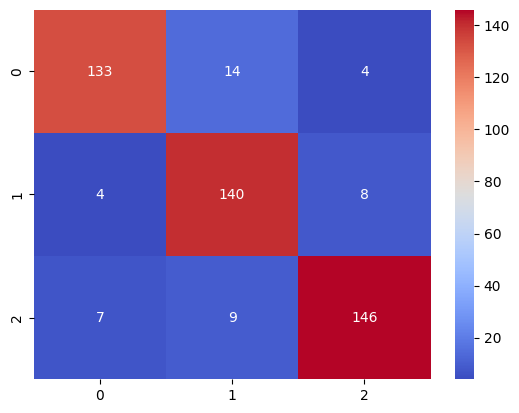

In [40]:
#Obtener las preficciones en validacion
print('SVM')
y_pred_test= modelo_2_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

## KMEANS

In [41]:
from sklearn.neighbors import KNeighborsClassifier
modelo_3= KNeighborsClassifier()
param_grid= {'n_neighbors': [3,5,7,9,11],
                'p': [1,2]}

classifier= GridSearchCV(estimator=modelo_3, param_grid=param_grid, cv=5)
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]})

In [42]:
validation=pd.concat([pd.DataFrame(classifier.cv_results_["params"]),pd.DataFrame(classifier.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

,n_neighbors,p,Accuracy
0,3,1,0.897696
1,3,2,0.896774
2,5,1,0.892166
3,5,2,0.891244
5,7,2,0.884793
4,7,1,0.883871
6,9,1,0.874654
8,11,1,0.870968
9,11,2,0.867281
7,9,2,0.866359


In [43]:
modelo_3_final= classifier.best_estimator_
modelo_3_final

KNeighborsClassifier(n_neighbors=3, p=1)

KMEANS
              precision    recall  f1-score   support

    Insomnia       0.92      0.89      0.90       151
        None       0.89      0.88      0.88       152
 Sleep Apnea       0.91      0.94      0.92       162

    accuracy                           0.90       465
   macro avg       0.90      0.90      0.90       465
weighted avg       0.90      0.90      0.90       465



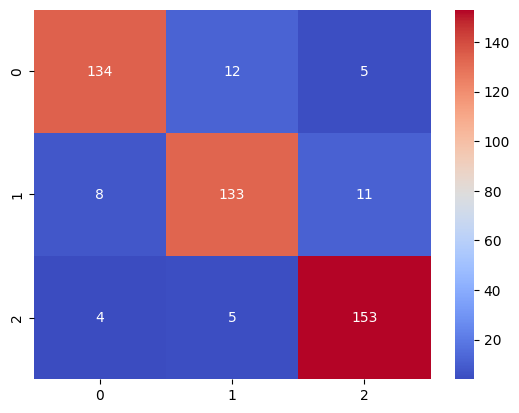

In [44]:
#Obtener las preficciones en validacion
print('KMEANS')
y_pred_test= modelo_3_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

## DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_graphviz,export_text
modelo_4 = DecisionTreeClassifier()
param_grid= {'criterion': ['gini', 'entropy','log_loss'],
                'max_depth': [5,15,20,10],
                'max_leaf_nodes': [None,10,12,15],
                'min_samples_split': [2,3,4,5]}

classifier= GridSearchCV(estimator=modelo_4, param_grid=param_grid, cv=5)
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 15, 20, 10],
                         'max_leaf_nodes': [None, 10, 12, 15],
                         'min_samples_split': [2, 3, 4, 5]})

In [46]:
validation=pd.concat([pd.DataFrame(classifier.cv_results_["params"]),pd.DataFrame(classifier.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,Accuracy
24,gini,15,12.0,2,0.910599
25,gini,15,12.0,3,0.910599
26,gini,15,12.0,4,0.910599
27,gini,15,12.0,5,0.910599
40,gini,20,12.0,2,0.910599
...,...,...,...,...,...
75,entropy,5,12.0,5,0.900461
139,log_loss,5,12.0,5,0.900461
138,log_loss,5,12.0,4,0.900461
137,log_loss,5,12.0,3,0.900461


In [47]:
modelo_4_final= classifier.best_estimator_
modelo_4_final

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=12)

Profundidad del arbol: 6
 Numero de hojas: 12


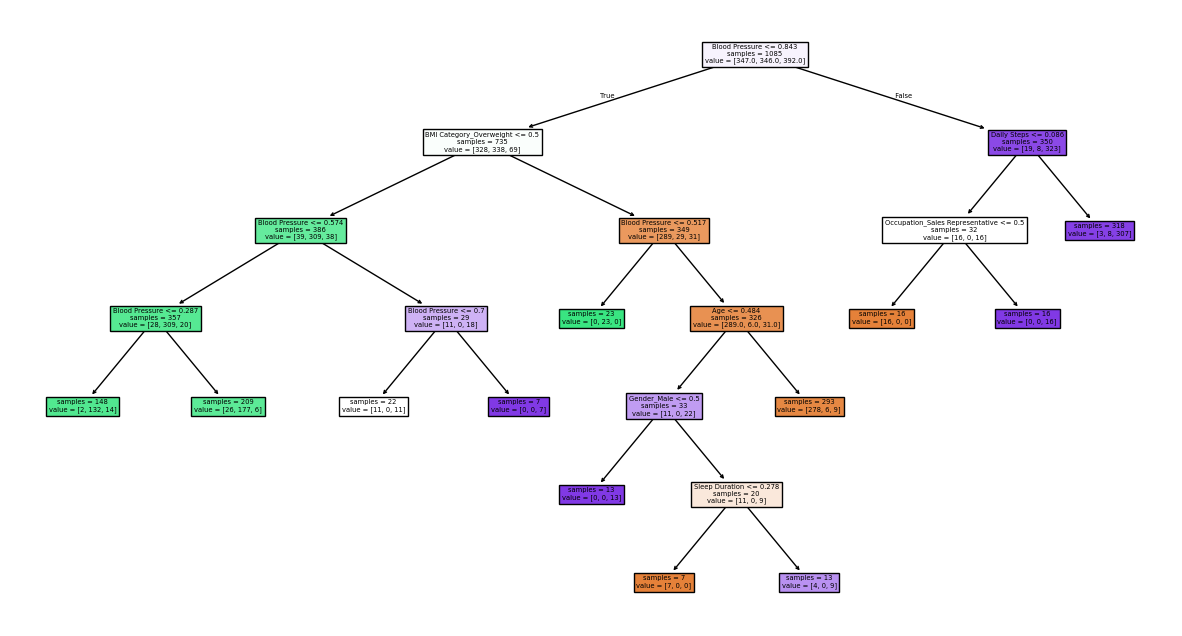

In [48]:
#grafiaco del arbol
fig, ax = plt.subplots(figsize=(15,8))
print(f'Profundidad del arbol: {modelo_4_final.get_depth()}\n Numero de hojas: {modelo_4_final.get_n_leaves()}')
plot= plot_tree(decision_tree=modelo_4_final,
                feature_names=labels,
               filled=True,
               impurity=False,
               ax=ax)




DecisionTreeClassifier
              precision    recall  f1-score   support

    Insomnia       0.92      0.88      0.90       151
        None       0.86      0.93      0.89       152
 Sleep Apnea       0.93      0.90      0.92       162

    accuracy                           0.90       465
   macro avg       0.90      0.90      0.90       465
weighted avg       0.90      0.90      0.90       465



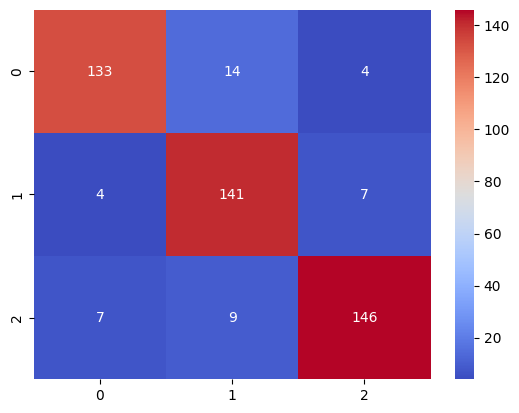

In [49]:
#Obtener las preficciones en validacion
print('DecisionTreeClassifier')
y_pred_test= modelo_4_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

## RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
modelo_5= RandomForestClassifier()
param_grid= {'n_estimators': [50,100,150,200],
                'criterion': ['gini', 'entropy', 'log_loss'],
                'max_depth': [2,3,5,7]}

In [51]:
classifier= GridSearchCV(estimator=modelo_5, param_grid=param_grid, cv=5)
classifier.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 7],
                         'n_estimators': [50, 100, 150, 200]})

In [52]:
validation=pd.concat([pd.DataFrame(classifier.cv_results_["params"]),pd.DataFrame(classifier.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

,criterion,max_depth,n_estimators,Accuracy
44,log_loss,7,50,0.916129
47,log_loss,7,200,0.916129
13,gini,7,100,0.915207
10,gini,5,150,0.915207
31,entropy,7,200,0.915207
28,entropy,7,50,0.915207
45,log_loss,7,100,0.915207
46,log_loss,7,150,0.915207
30,entropy,7,150,0.914286
29,entropy,7,100,0.914286


In [53]:
modelo_5_final = classifier.best_estimator_
modelo_5_final

RandomForestClassifier(criterion='log_loss', max_depth=7, n_estimators=50)

RandomForestClassifier
              precision    recall  f1-score   support

    Insomnia       0.94      0.87      0.91       151
        None       0.86      0.93      0.89       152
 Sleep Apnea       0.93      0.92      0.92       162

    accuracy                           0.91       465
   macro avg       0.91      0.91      0.91       465
weighted avg       0.91      0.91      0.91       465



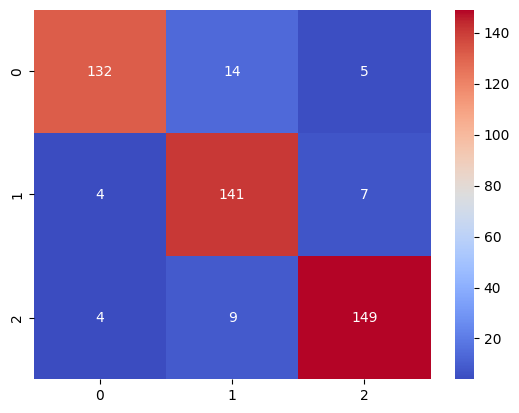

In [54]:
#Obtener las preficciones en validacion
print('RandomForestClassifier')
y_pred_test= modelo_5_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

## AdaBoostClassifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier
modelo_6= AdaBoostClassifier()
param_grid= {'n_estimators': [50,100,150,200,250,300,350,400]}

In [56]:
classifier= GridSearchCV(estimator=modelo_6, param_grid=param_grid, cv=5)
classifier.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400]})

In [57]:
modelo_6_final = classifier.best_estimator_
modelo_6_final

AdaBoostClassifier(n_estimators=250)

AdaBoostClassifier
              precision    recall  f1-score   support

    Insomnia       0.94      0.87      0.91       151
        None       0.86      0.93      0.89       152
 Sleep Apnea       0.93      0.92      0.92       162

    accuracy                           0.91       465
   macro avg       0.91      0.91      0.91       465
weighted avg       0.91      0.91      0.91       465



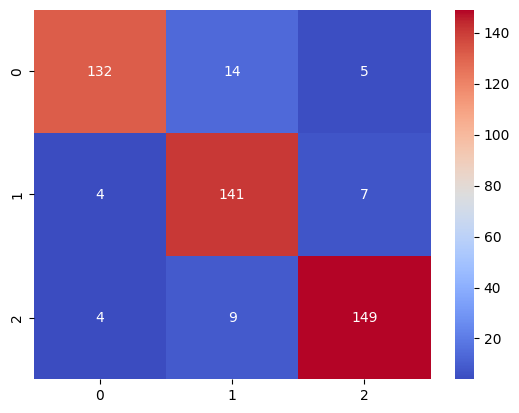

In [58]:
#Obtener las preficciones en validacion
print('AdaBoostClassifier')
y_pred_test= modelo_5_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

## GradientBoostingClassifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_7= GradientBoostingClassifier()
param_grid= {'n_estimators': [50,100],
             'criterion': ['friedman_mse', 'squared_error'],
             'max_depth': [3,5,7]}


In [60]:
classifier= GridSearchCV(estimator=modelo_7, param_grid=param_grid, cv=5)
classifier.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100]})

In [61]:
validation=pd.concat([pd.DataFrame(classifier.cv_results_["params"]),pd.DataFrame(classifier.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

,criterion,max_depth,n_estimators,Accuracy
0,friedman_mse,3,50,0.916129
6,squared_error,3,50,0.916129
3,friedman_mse,5,100,0.906912
2,friedman_mse,5,50,0.906912
9,squared_error,5,100,0.906912
8,squared_error,5,50,0.906912
10,squared_error,7,50,0.905991
4,friedman_mse,7,50,0.905991
5,friedman_mse,7,100,0.905991
1,friedman_mse,3,100,0.905069


In [62]:
modelo_7_final = classifier.best_estimator_
modelo_7_final

GradientBoostingClassifier(n_estimators=50)

GradientBoostingClassifier
              precision    recall  f1-score   support

    Insomnia       0.94      0.87      0.91       151
        None       0.86      0.93      0.89       152
 Sleep Apnea       0.93      0.92      0.92       162

    accuracy                           0.91       465
   macro avg       0.91      0.91      0.91       465
weighted avg       0.91      0.91      0.91       465



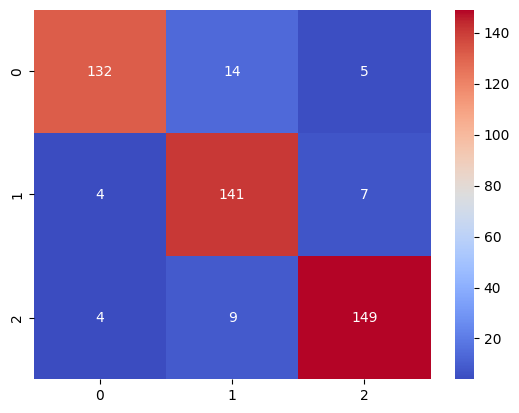

In [63]:
#Obtener las preficciones en validacion
print('GradientBoostingClassifier')
y_pred_test= modelo_5_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

## Neuronal Multicapa

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
modelo_8= MLPClassifier()
param_grid= {'hidden_layer_sizes': [(100,),(30,20,10),(20,10),(30,40)],
             'learning_rate_init': [0.001,0.01,0.1,1,10],
             'solver': ['adam', 'sgd'],
             'activation': ['logistic', 'tanh', 'relu'],
             'max_iter': [200,300,400]}

In [65]:
classifier= RandomizedSearchCV(estimator=modelo_8, param_distributions=param_grid, cv=5, n_iter=120)
classifier.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=120,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (30, 20, 10),
                                                               (20, 10),
                                                               (30, 40)],
                                        'learning_rate_init': [0.001, 0.01, 0.1,
                                                               1, 10],
                                        'max_iter': [200, 300, 400],
                                        'solver': ['adam', 'sgd']})

In [66]:
modelo_8_final = classifier.best_estimator_
modelo_8_final

MLPClassifier(activation='logistic', hidden_layer_sizes=(30, 40),
              learning_rate_init=0.1, max_iter=300)

ensamble
              precision    recall  f1-score   support

    Insomnia       0.90      0.89      0.90       151
        None       0.86      0.92      0.89       152
 Sleep Apnea       0.94      0.88      0.91       162

    accuracy                           0.90       465
   macro avg       0.90      0.90      0.90       465
weighted avg       0.90      0.90      0.90       465



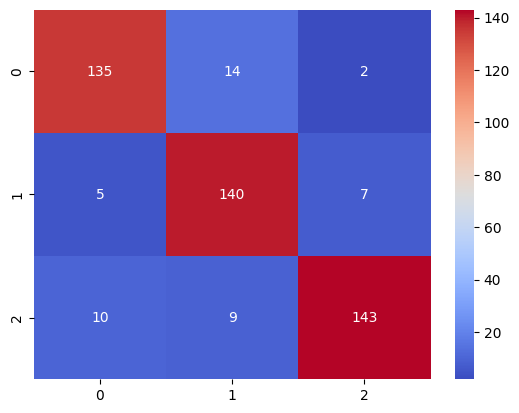

In [67]:
#Obtener las preficciones en validacion
print('ensamble')
y_pred_test= modelo_8_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

# Conclusiones


Evaluando modelo_1_final...

Classification Report for modelo_1_final:
               precision    recall  f1-score   support

    Insomnia       0.95      0.87      0.91       151
        None       0.86      0.91      0.89       152
 Sleep Apnea       0.92      0.93      0.92       162

    accuracy                           0.91       465
   macro avg       0.91      0.90      0.91       465
weighted avg       0.91      0.91      0.91       465


Confusion Matrix for modelo_1_final:
 [[131  14   6]
 [  5 139   8]
 [  2   9 151]]

Evaluando modelo_2_final...

Classification Report for modelo_2_final:
               precision    recall  f1-score   support

    Insomnia       0.92      0.88      0.90       151
        None       0.86      0.92      0.89       152
 Sleep Apnea       0.92      0.90      0.91       162

    accuracy                           0.90       465
   macro avg       0.90      0.90      0.90       465
weighted avg       0.90      0.90      0.90       465


Confus

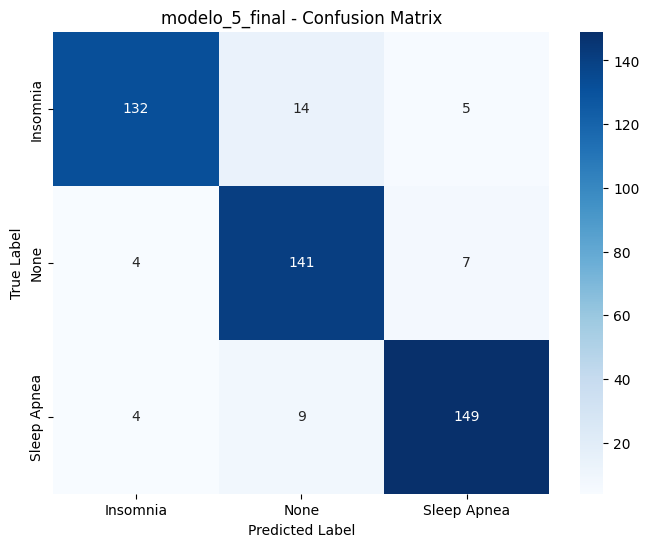


Resultados de todos los modelos que superan el 85% de precisión:
            Model  Accuracy  F1 Score  \
0  modelo_1_final  0.905376  0.905376   
1  modelo_2_final  0.901075  0.901075   
2  modelo_3_final  0.903226  0.903226   
3  modelo_4_final  0.903226  0.903226   
4  modelo_5_final  0.907527  0.907527   
5  modelo_7_final  0.907527  0.907527   
6  modelo_8_final  0.898925  0.898925   

                            Confusion Matrix  
0   [[131, 14, 6], [5, 139, 8], [2, 9, 151]]  
1   [[133, 14, 4], [4, 140, 8], [7, 9, 146]]  
2  [[134, 12, 5], [8, 133, 11], [4, 5, 153]]  
3   [[133, 14, 4], [4, 141, 7], [7, 9, 146]]  
4   [[132, 14, 5], [4, 141, 7], [4, 9, 149]]  
5   [[132, 14, 5], [4, 141, 7], [4, 9, 149]]  
6  [[135, 14, 2], [5, 140, 7], [10, 9, 143]]  


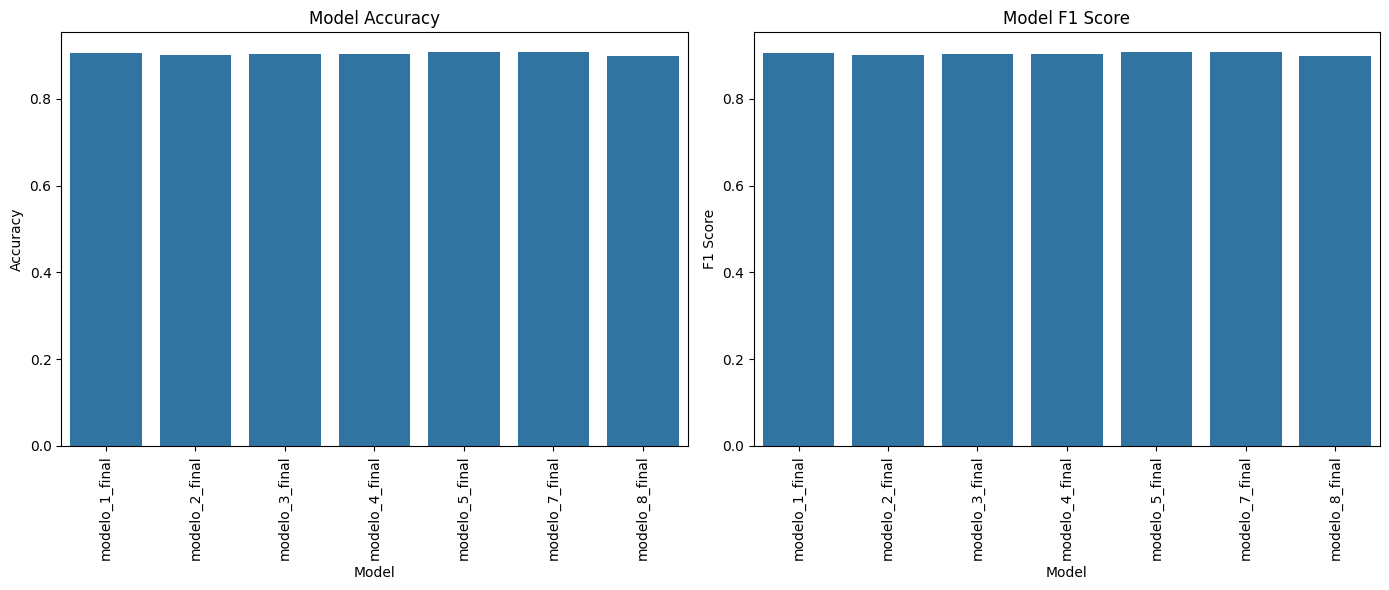

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np

def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

def compare_existing_models(models, X_test, y_test):
    best_model = None
    best_f1_score = -1
    best_accuracy = 0
    best_conf_matrix = None

    results = []

    for name, model in models.items():
        print(f"\nEvaluando {name}...")
        
        # Predict and generate classification report
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Handle binary and multiclass classification
        if len(report) > 2:  # Multiclass classification
            f1 = report['accuracy']  # Use 'accuracy' or calculate average F1-score
        else:  # Binary classification
            pos_class = next(iter(report.keys()))
            f1 = report[pos_class]['f1-score']

        # Store the confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Filter models based on accuracy
        if accuracy > 0.85:
            results.append((name, accuracy, f1, conf_matrix))

            # Print classification report and confusion matrix
            print(f"\nClassification Report for {name}:\n", classification_report(y_test, y_pred))
            print(f"\nConfusion Matrix for {name}:\n", conf_matrix)

            # Update the best model based on F1-score and accuracy
            if f1 > best_f1_score:
                best_f1_score = f1
                best_accuracy = accuracy
                best_model = name
                best_conf_matrix = conf_matrix

    # Print best model based on F1-score and accuracy
    if best_model:
        print(f"\nMejor modelo basado en el F1-score y precisión: {best_model}")
        print(f"Precisión: {best_accuracy:.2f}, F1-score: {best_f1_score:.2f}")
        print(f"Matriz de Confusión:\n{best_conf_matrix}")
        plot_confusion_matrix(best_conf_matrix, classes=np.unique(y_test), title=f'{best_model} - Confusion Matrix')
    else:
        print("Ningún modelo superó el umbral de precisión del 85%.")

    # Optional: Show all results in a bar plot
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score', 'Confusion Matrix'])
    print("\nResultados de todos los modelos que superan el 85% de precisión:")
    print(results_df)

    # Plot accuracy and F1-score
    plt.figure(figsize=(14, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    sns.barplot(x='Model', y='Accuracy', data=results_df)
    plt.xticks(rotation=90)
    plt.title('Model Accuracy')

    # Plot F1-score
    plt.subplot(1, 2, 2)
    sns.barplot(x='Model', y='F1 Score', data=results_df)
    plt.xticks(rotation=90)
    plt.title('Model F1 Score')

    plt.tight_layout()
    plt.show()

# Example usage
models = {
    'modelo_1_final': modelo_1_final,
    'modelo_2_final': modelo_2_final,
    'modelo_3_final': modelo_3_final,
    'modelo_4_final': modelo_4_final,
    'modelo_5_final': modelo_5_final,
    'modelo_6_final': modelo_6_final,
    'modelo_7_final': modelo_7_final,
    'modelo_8_final': modelo_8_final
}

# Assume X_test and y_test are defined
compare_existing_models(models, X_test, y_test)



Evaluando modelo_1_final...

Evaluando modelo_2_final...
El modelo modelo_2_final no tiene el método 'predict_proba'.

Evaluando modelo_3_final...

Evaluando modelo_4_final...

Evaluando modelo_5_final...

Evaluando modelo_6_final...

Evaluando modelo_7_final...

Evaluando modelo_8_final...


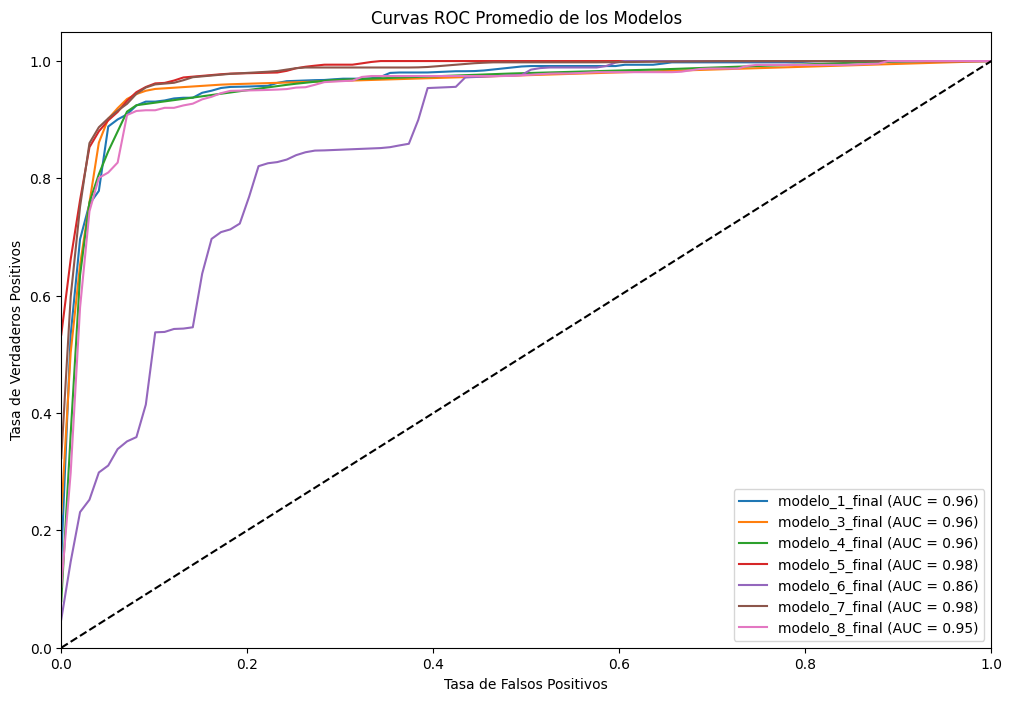

In [71]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(12, 8))

    # Binarize the output
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    
    for name, model in models.items():
        print(f"\nEvaluando {name}...")

        try:
            # Predict probabilities
            y_prob = model.predict_proba(X_test)
        except AttributeError:
            print(f"El modelo {name} no tiene el método 'predict_proba'.")
            continue

        # Calculate ROC curve and AUC for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        n_classes = y_test_binarized.shape[1]

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute the mean ROC curve and AUC
        all_fpr = np.linspace(0, 1, 100)
        mean_tpr = np.zeros_like(all_fpr)

        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

        mean_tpr /= n_classes
        mean_auc = auc(all_fpr, mean_tpr)

        # Plot the mean ROC curve
        plt.plot(all_fpr, mean_tpr, label=f'{name} (AUC = {mean_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curvas ROC Promedio de los Modelos')
    plt.legend(loc='lower right')
    plt.show()

# Example usage
models = {
    'modelo_1_final': modelo_1_final,
    'modelo_2_final': modelo_2_final,
    'modelo_3_final': modelo_3_final,
    'modelo_4_final': modelo_4_final,
    'modelo_5_final': modelo_5_final,
    'modelo_6_final': modelo_6_final,
    'modelo_7_final': modelo_7_final,
    'modelo_8_final': modelo_8_final
}

# Assume X_test and y_test are defined
plot_roc_curves(models, X_test, y_test)
